In [1]:
path = "/home/ai-sjjy/workspace/juyoung/programmers/dataset/"

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## [1] dataset

1. train.csv => userID/jobID/applied
2. job/job_companies.csv => companyID/jobID/companySize
3. job/job_tags.csv => jobID/tagID
4. job/tags.csv => tagID/keyword
5. job/user_tags.csv => userID/tagID
6. test_job.csv

In [3]:
train_df = pd.read_csv(path+'train.csv')

job_company = pd.read_csv(path+'job/job_companies.csv')
job_tags = pd.read_csv(path+'job/job_tags.csv')
tags = pd.read_csv(path+'job/tags.csv')
user_tags = pd.read_csv(path+'job/user_tags.csv')


In [4]:
temp = pd.read_csv(path+'train.csv')

In [5]:
test_df = pd.read_csv(path+'test_job.csv')

In [6]:
print(len(temp))
print(len(test_df))

print(len(job_company))
print(len(job_tags))
print(len(tags))
print(len(user_tags))

6000
2435
733
3477
887
17194


### [1-1] train

In [7]:
train_df.head(5)

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userID   6000 non-null   object
 1   jobID    6000 non-null   object
 2   applied  6000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 140.8+ KB


* applied의 0과 1 비율 확인

=> 1의 비율이 너무 적다

<AxesSubplot:xlabel='applied', ylabel='count'>

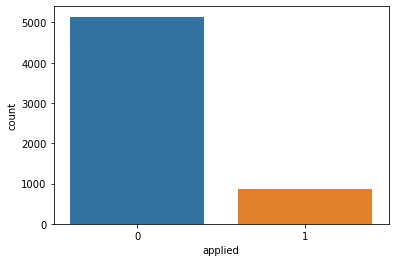

In [9]:
sns.countplot(x='applied', data=train_df)

In [10]:
# 결측치 확인
train_df.isnull().sum()

userID     0
jobID      0
applied    0
dtype: int64

In [11]:
# 결측치 확인
job_company.isnull().sum()

companyID       0
jobID           0
companySize    90
dtype: int64

* companySize 쪽에서 nan 있음

In [12]:
# 결측치 확인
job_tags.isnull().sum()

jobID    0
tagID    0
dtype: int64

In [13]:
# 결측치 확인
user_tags.isnull().sum()

userID    0
tagID     0
dtype: int64

### [1-2] train_test 합치기

In [14]:
test_df['applied'] = -1

In [15]:
total_df = pd.concat([train_df, test_df])

In [16]:
total_df.head(5)

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0


### [1-3] train에 job_company 합쳐서 보기

* 먼저 company + job에 대한 키워드 태그 합치기

In [17]:
total_df = pd.merge(total_df, job_company, how='outer',on='jobID')

In [18]:
total_df.head(5)

,userID,jobID,applied,companyID,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,4f6ffe13a5d75b2d6a3923922b3922e5,11-50
1,1d0d19d2d7d31ccf3747614aec7273c8,15de21c670ae7c3f6f3f1f37029303c9,0,4f6ffe13a5d75b2d6a3923922b3922e5,11-50
2,c70daf247944fe3add32218f914c75a6,15de21c670ae7c3f6f3f1f37029303c9,0,4f6ffe13a5d75b2d6a3923922b3922e5,11-50
3,883b4172416f7b84234d3aeda4199f8f,15de21c670ae7c3f6f3f1f37029303c9,1,4f6ffe13a5d75b2d6a3923922b3922e5,11-50
4,6bc5d37951120d6d49672ce647c4e563,15de21c670ae7c3f6f3f1f37029303c9,0,4f6ffe13a5d75b2d6a3923922b3922e5,11-50


In [19]:
total_df.drop(['companyID'], axis=1, inplace=True)

In [20]:
total_df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,userID,jobID,applied,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,11-50
1,1d0d19d2d7d31ccf3747614aec7273c8,15de21c670ae7c3f6f3f1f37029303c9,0,11-50
2,c70daf247944fe3add32218f914c75a6,15de21c670ae7c3f6f3f1f37029303c9,0,11-50
3,883b4172416f7b84234d3aeda4199f8f,15de21c670ae7c3f6f3f1f37029303c9,1,11-50
4,6bc5d37951120d6d49672ce647c4e563,15de21c670ae7c3f6f3f1f37029303c9,0,11-50
...,...,...,...,...
8430,1f1baa5b8edac74eb4eaa329f14a0361,d81f9c1be2e08964bf9f24b15f0e4900,-1,NaN
8431,ebaee1af0c501f22ddfe242fc16dae53,a51fb975227d6640e4fe47854476d133,-1,201-500
8432,fa2a28ade168508972790316e314d47e,7940ab47468396569a906f75ff3f20ef,-1,11-50
8433,3e15cc11f979ed25912dff5b0669f2cd,74bba22728b6185eec06286af6bec36d,-1,11-50


In [21]:
total_df['applied'].isnull().sum()

0

In [22]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8435 entries, 0 to 8434
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userID       8435 non-null   object
 1   jobID        8435 non-null   object
 2   applied      8435 non-null   int64 
 3   companySize  7532 non-null   object
dtypes: int64(1), object(3)
memory usage: 329.5+ KB


## [2] DATA EDA

### [2-1] companyID 범위 나누기

In [23]:
total_df.companySize.unique()

array(['11-50', '101-200', nan, '51-100', '201-500', '1-10', '1000 이상',
       '501-1000'], dtype=object)

##### 범주형으로 변경

* '1-10' : 'A'
* '11-50' : 'B'
* '51-100' : 'C'
* '101-200' : 'D'
* '201-500' : 'E'
* '501-1000' : 'F'
* '1000 이상' : 'G'
* 'none' : 'None'

In [24]:
companySize = total_df.companySize.tolist()

for idx, com in enumerate(companySize):
    if com == '1-10': companySize[idx] = 'A'
    elif com == '11-50': companySize[idx] = 'B'
    elif com == '51-100': companySize[idx] = 'C'
    elif com == '101-200': companySize[idx] = 'D'
    elif com == '201-500': companySize[idx] = 'E'
    elif com == '501-1000': companySize[idx] = 'F'
    elif com == '1000 이상': companySize[idx] = 'G'
    else: companySize[idx] = 'None'

In [25]:
total_df['companySize'] = companySize

#### [2-1-1] 회사 크기와 관계

<AxesSubplot:xlabel='companySize', ylabel='count'>

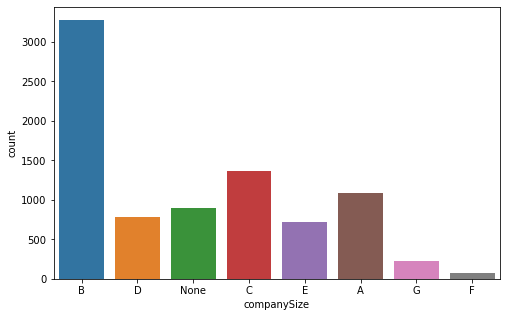

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='companySize', data=total_df)

* applied 회사에 등록할 때, B(11-50)이 크고 / 등록하지 않았을 때 B(11-50)가 압도적으로 크고 그 다음부터 조금씩 다르다

<AxesSubplot:xlabel='companySize', ylabel='count'>

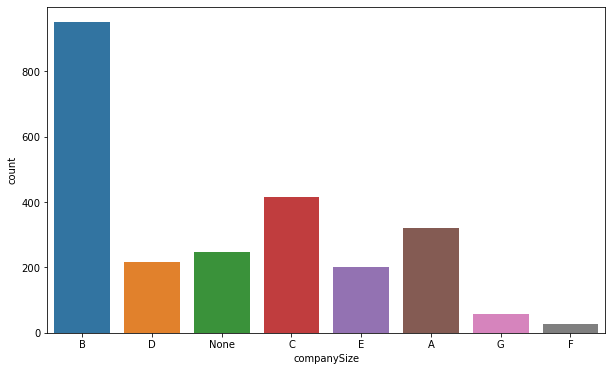

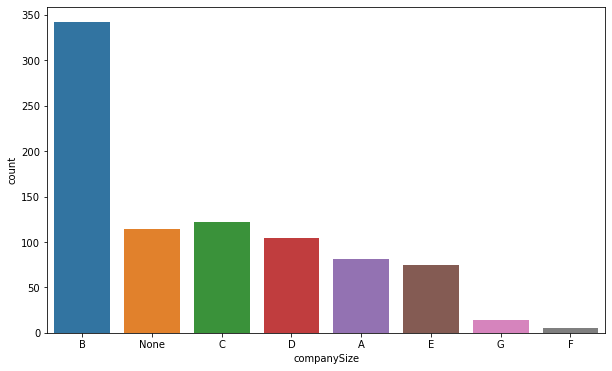

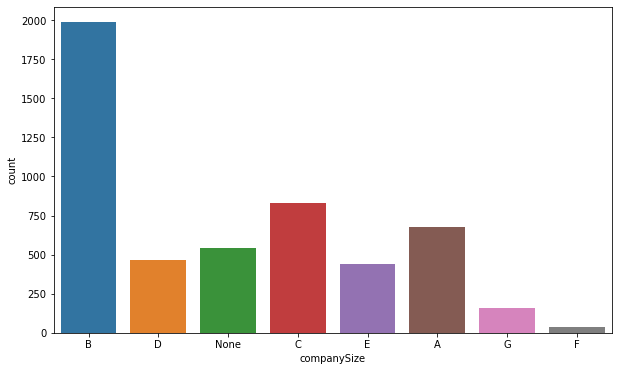

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='companySize', data=total_df[total_df['applied'] == -1])

plt.figure(figsize=(10, 6))
sns.countplot(x='companySize', data=total_df[total_df['applied'] == 1])


plt.figure(figsize=(10, 6))
sns.countplot(x='companySize', data=total_df[total_df['applied'] == 0])

* test일 경우 : B-C-NONE-D-A-E-G-F
* Applied할 경우 : B-C-None-D-A-E-G-F
* Not Applied할 경우 : B-C-A-None-D-E-G-F

### [2-2] job_keyword / user_keyword

* job keyword랑 user keyword간의 연관성

=> 두 키워드간에 공통 된 키워드 뽑으면 되낭..?

* job_tags/user_tags

In [28]:
total_df.head(3)

,userID,jobID,applied,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,B
1,1d0d19d2d7d31ccf3747614aec7273c8,15de21c670ae7c3f6f3f1f37029303c9,0,B
2,c70daf247944fe3add32218f914c75a6,15de21c670ae7c3f6f3f1f37029303c9,0,B


In [29]:
job_tags.head(3)

,jobID,tagID
0,320722549d1751cf3f247855f937b982,d38901788c533e8286cb6400b40b386d
1,e744f91c29ec99f0e662c9177946c627,3948ead63a9f2944218de038d8934305
2,e744f91c29ec99f0e662c9177946c627,0e095e054ee94774d6a496099eb1cf6a


In [30]:
job_tag_infos = dict()
jID, tID = job_tags.jobID.tolist(), job_tags.tagID.tolist()

for idx in range(len(jID)):
    if jID[idx] not in job_tag_infos.keys(): job_tag_infos[jID[idx]] = {tID[idx]}
    else: job_tag_infos[jID[idx]].add(tID[idx])

In [31]:
user_tags.head(3)

,userID,tagID
0,e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
1,e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
2,e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28


In [32]:
user_tag_infos = dict()
uID, tID = user_tags.userID	.tolist(), user_tags.tagID.tolist()

for idx in range(len(uID)):
    if uID[idx] not in user_tag_infos.keys(): user_tag_infos[uID[idx]] = {tID[idx]}
    else: user_tag_infos[uID[idx]].add(tID[idx])

In [33]:
user_tags[user_tags['userID']=='fe292163d06253b716e9a0099b42031d']

,userID,tagID
4100,fe292163d06253b716e9a0099b42031d,285ab9448d2751ee57ece7f762c39095
4101,fe292163d06253b716e9a0099b42031d,a1d50185e7426cbb0acad1e6ca74b9aa
4102,fe292163d06253b716e9a0099b42031d,f47330643ae134ca204bf6b2481fec47
4103,fe292163d06253b716e9a0099b42031d,5680522b8e2bb01943234bce7bf84534
4104,fe292163d06253b716e9a0099b42031d,285f89b802bcb2651801455c86d78f2a
...,...,...
11811,fe292163d06253b716e9a0099b42031d,285ab9448d2751ee57ece7f762c39095
11812,fe292163d06253b716e9a0099b42031d,81dc9bdb52d04dc20036dbd8313ed055
11815,fe292163d06253b716e9a0099b42031d,285f89b802bcb2651801455c86d78f2a
11816,fe292163d06253b716e9a0099b42031d,fe2d010308a6b3799a3d9c728ee74244


In [34]:
user_id = total_df.userID.tolist()
job_id = total_df.jobID.tolist()

In [35]:
user_tag_count = []
job_tag_count = []
user_job_tag_inter = []

for idx in range(len(user_id)):
    # [1] user_tag 가져오기
    user_tags_set = user_tag_infos[user_id[idx]]
    
    # [2] job_tag 가져오기
    job_tags_set = job_tag_infos[job_id[idx]]
    
    # [3] user tag, job tag, user_job intersaction 개수 저장
    user_tag_count.append(len(user_tags_set))
    job_tag_count.append(len(job_tags_set))
    user_job_tag_inter.append(len(user_tags_set & job_tags_set))

total_df['user_tag_count'] = user_tag_count
total_df['job_tag_count'] = job_tag_count
total_df['user_job_tag_inter'] = user_job_tag_inter

In [36]:
total_df

,userID,jobID,applied,companySize,user_tag_count,job_tag_count,user_job_tag_inter
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,B,13,2,0
1,1d0d19d2d7d31ccf3747614aec7273c8,15de21c670ae7c3f6f3f1f37029303c9,0,B,25,2,0
2,c70daf247944fe3add32218f914c75a6,15de21c670ae7c3f6f3f1f37029303c9,0,B,6,2,0
3,883b4172416f7b84234d3aeda4199f8f,15de21c670ae7c3f6f3f1f37029303c9,1,B,4,2,0
4,6bc5d37951120d6d49672ce647c4e563,15de21c670ae7c3f6f3f1f37029303c9,0,B,11,2,0
...,...,...,...,...,...,...,...
8430,1f1baa5b8edac74eb4eaa329f14a0361,d81f9c1be2e08964bf9f24b15f0e4900,-1,None,31,2,2
8431,ebaee1af0c501f22ddfe242fc16dae53,a51fb975227d6640e4fe47854476d133,-1,E,13,3,1
8432,fa2a28ade168508972790316e314d47e,7940ab47468396569a906f75ff3f20ef,-1,B,10,3,0
8433,3e15cc11f979ed25912dff5b0669f2cd,74bba22728b6185eec06286af6bec36d,-1,B,17,3,0


* 사용자 관심 키워드(많이 적음)
* 회사가 원하는 키워드 => 적음 
* 그러니까, 관심도 확인하려면 intersaction/회사가 원하는 키워드

In [37]:
total_df['keyword_ratio'] = total_df['user_job_tag_inter']/total_df['job_tag_count']

In [38]:
total_df

,userID,jobID,applied,companySize,user_tag_count,job_tag_count,user_job_tag_inter,keyword_ratio
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,B,13,2,0,0.000000
1,1d0d19d2d7d31ccf3747614aec7273c8,15de21c670ae7c3f6f3f1f37029303c9,0,B,25,2,0,0.000000
2,c70daf247944fe3add32218f914c75a6,15de21c670ae7c3f6f3f1f37029303c9,0,B,6,2,0,0.000000
3,883b4172416f7b84234d3aeda4199f8f,15de21c670ae7c3f6f3f1f37029303c9,1,B,4,2,0,0.000000
4,6bc5d37951120d6d49672ce647c4e563,15de21c670ae7c3f6f3f1f37029303c9,0,B,11,2,0,0.000000
...,...,...,...,...,...,...,...,...
8430,1f1baa5b8edac74eb4eaa329f14a0361,d81f9c1be2e08964bf9f24b15f0e4900,-1,None,31,2,2,1.000000
8431,ebaee1af0c501f22ddfe242fc16dae53,a51fb975227d6640e4fe47854476d133,-1,E,13,3,1,0.333333
8432,fa2a28ade168508972790316e314d47e,7940ab47468396569a906f75ff3f20ef,-1,B,10,3,0,0.000000
8433,3e15cc11f979ed25912dff5b0669f2cd,74bba22728b6185eec06286af6bec36d,-1,B,17,3,0,0.000000


* 이 ratio가 applied에 영향을 끼치는가?

In [39]:
temp_df = total_df[total_df['applied'] != -1]

In [40]:
temp_df

,userID,jobID,applied,companySize,user_tag_count,job_tag_count,user_job_tag_inter,keyword_ratio
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,B,13,2,0,0.000000
1,1d0d19d2d7d31ccf3747614aec7273c8,15de21c670ae7c3f6f3f1f37029303c9,0,B,25,2,0,0.000000
2,c70daf247944fe3add32218f914c75a6,15de21c670ae7c3f6f3f1f37029303c9,0,B,6,2,0,0.000000
3,883b4172416f7b84234d3aeda4199f8f,15de21c670ae7c3f6f3f1f37029303c9,1,B,4,2,0,0.000000
4,6bc5d37951120d6d49672ce647c4e563,15de21c670ae7c3f6f3f1f37029303c9,0,B,11,2,0,0.000000
...,...,...,...,...,...,...,...,...
8395,946aa0c612952da8d67dd338a43d5929,f29b38f160f87ae86df31cee1982066f,0,F,6,7,2,0.285714
8397,fd1b4044581c63b9cb16d91958302072,92262bf907af914b95a0fc33c3f33bf6,0,B,22,3,0,0.000000
8398,b94a3f555cc529e2ef5d5277651a33c1,caf1a3dfb505ffed0d024130f58c5cfa,0,B,10,3,0,0.000000
8404,78492ae8ee0c7aeab730674170296142,7f1171a78ce0780a2142a6eb7bc4f3c8,1,A,5,11,1,0.090909


* 아래 그래프보면, 그래도 ratio가 높아야 지원할 확률이 높다
* ration가 낮을수록 지원하지 않는 경향이 있다

<AxesSubplot:xlabel='applied', ylabel='keyword_ratio'>

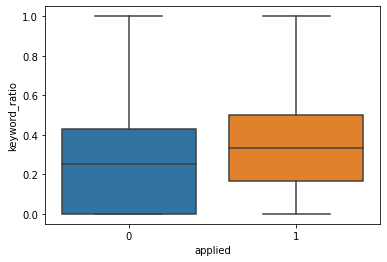

In [41]:
sns.boxplot(x=temp_df['applied'], y=temp_df['keyword_ratio'])

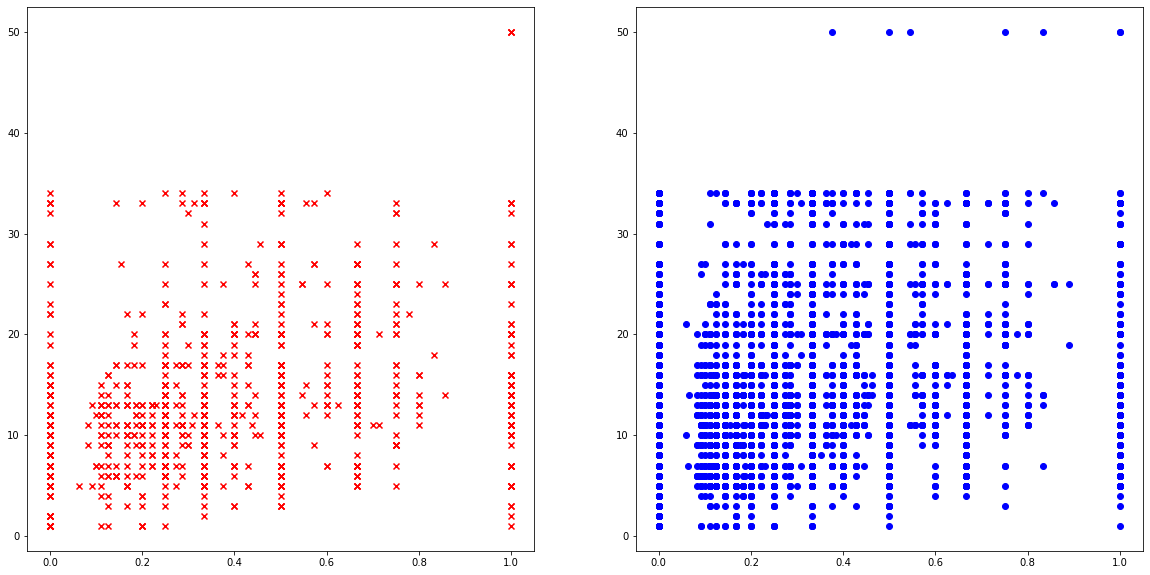

In [42]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(x=temp_df[temp_df['applied']==1]['keyword_ratio'], y=temp_df[temp_df['applied']==1]['user_tag_count'], color='r', marker="x")
plt.subplot(1, 2, 2)
plt.scatter(x=temp_df[temp_df['applied']==0]['keyword_ratio'], y=temp_df[temp_df['applied']==0]['user_tag_count'], color='b')

## [3] Model

### [3-1] 범주형 데이터 처리

* 일단, Company size는 범주형이니까, 학습할 수 있도록 변경
* one-hot encoding 진행

In [43]:
total_df = pd.get_dummies(total_df, columns=['companySize'])

In [44]:
total_df

,userID,jobID,applied,user_tag_count,job_tag_count,user_job_tag_inter,keyword_ratio,companySize_A,companySize_B,companySize_C,companySize_D,companySize_E,companySize_F,companySize_G,companySize_None
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,13,2,0,0.000000,0,1,0,0,0,0,0,0
1,1d0d19d2d7d31ccf3747614aec7273c8,15de21c670ae7c3f6f3f1f37029303c9,0,25,2,0,0.000000,0,1,0,0,0,0,0,0
2,c70daf247944fe3add32218f914c75a6,15de21c670ae7c3f6f3f1f37029303c9,0,6,2,0,0.000000,0,1,0,0,0,0,0,0
3,883b4172416f7b84234d3aeda4199f8f,15de21c670ae7c3f6f3f1f37029303c9,1,4,2,0,0.000000,0,1,0,0,0,0,0,0
4,6bc5d37951120d6d49672ce647c4e563,15de21c670ae7c3f6f3f1f37029303c9,0,11,2,0,0.000000,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,1f1baa5b8edac74eb4eaa329f14a0361,d81f9c1be2e08964bf9f24b15f0e4900,-1,31,2,2,1.000000,0,0,0,0,0,0,0,1
8431,ebaee1af0c501f22ddfe242fc16dae53,a51fb975227d6640e4fe47854476d133,-1,13,3,1,0.333333,0,0,0,0,1,0,0,0
8432,fa2a28ade168508972790316e314d47e,7940ab47468396569a906f75ff3f20ef,-1,10,3,0,0.000000,0,1,0,0,0,0,0,0
8433,3e15cc11f979ed25912dff5b0669f2cd,74bba22728b6185eec06286af6bec36d,-1,17,3,0,0.000000,0,1,0,0,0,0,0,0


### [3-2] train, test 분리

* 분리하기 전에 먼저 필요없는 열 제거 : user_tag_count, job_tag_count, user_job_tag_inter

In [45]:
total_df.drop('user_tag_count', axis=1, inplace=True)
total_df.drop('job_tag_count', axis=1, inplace=True)
total_df.drop('user_job_tag_inter', axis=1, inplace=True)

In [46]:
train_df = total_df[total_df['applied'] != -1]
test_df = total_df[total_df['applied']  == -1]

In [47]:
len(train_df)

6000

In [48]:
len(test_df)

2435

In [49]:
train_df

,userID,jobID,applied,keyword_ratio,companySize_A,companySize_B,companySize_C,companySize_D,companySize_E,companySize_F,companySize_G,companySize_None
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,0.000000,0,1,0,0,0,0,0,0
1,1d0d19d2d7d31ccf3747614aec7273c8,15de21c670ae7c3f6f3f1f37029303c9,0,0.000000,0,1,0,0,0,0,0,0
2,c70daf247944fe3add32218f914c75a6,15de21c670ae7c3f6f3f1f37029303c9,0,0.000000,0,1,0,0,0,0,0,0
3,883b4172416f7b84234d3aeda4199f8f,15de21c670ae7c3f6f3f1f37029303c9,1,0.000000,0,1,0,0,0,0,0,0
4,6bc5d37951120d6d49672ce647c4e563,15de21c670ae7c3f6f3f1f37029303c9,0,0.000000,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8395,946aa0c612952da8d67dd338a43d5929,f29b38f160f87ae86df31cee1982066f,0,0.285714,0,0,0,0,0,1,0,0
8397,fd1b4044581c63b9cb16d91958302072,92262bf907af914b95a0fc33c3f33bf6,0,0.000000,0,1,0,0,0,0,0,0
8398,b94a3f555cc529e2ef5d5277651a33c1,caf1a3dfb505ffed0d024130f58c5cfa,0,0.000000,0,1,0,0,0,0,0,0
8404,78492ae8ee0c7aeab730674170296142,7f1171a78ce0780a2142a6eb7bc4f3c8,1,0.090909,1,0,0,0,0,0,0,0


* test dataset에서 applied 열 drop

In [50]:
test_df.drop('applied', axis=1, inplace=True)

/home/ai-sjjy/anaconda3/envs/juyoung2/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
test_df

,userID,jobID,keyword_ratio,companySize_A,companySize_B,companySize_C,companySize_D,companySize_E,companySize_F,companySize_G,companySize_None
25,d41e0e6f6f1e29098d9d152511503ab2,15de21c670ae7c3f6f3f1f37029303c9,0.000000,0,1,0,0,0,0,0,0
26,946aa0c612952da8d67dd338a43d5929,15de21c670ae7c3f6f3f1f37029303c9,0.000000,0,1,0,0,0,0,0,0
27,4b847237599e42b2e62a06cdfbe693ec,15de21c670ae7c3f6f3f1f37029303c9,0.000000,0,1,0,0,0,0,0,0
28,bd652bf1e9b66171ef77f1e0db2e9c1e,15de21c670ae7c3f6f3f1f37029303c9,0.000000,0,1,0,0,0,0,0,0
29,6a901742172397a9e4c31a159a982708,15de21c670ae7c3f6f3f1f37029303c9,0.000000,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8430,1f1baa5b8edac74eb4eaa329f14a0361,d81f9c1be2e08964bf9f24b15f0e4900,1.000000,0,0,0,0,0,0,0,1
8431,ebaee1af0c501f22ddfe242fc16dae53,a51fb975227d6640e4fe47854476d133,0.333333,0,0,0,0,1,0,0,0
8432,fa2a28ade168508972790316e314d47e,7940ab47468396569a906f75ff3f20ef,0.000000,0,1,0,0,0,0,0,0
8433,3e15cc11f979ed25912dff5b0669f2cd,74bba22728b6185eec06286af6bec36d,0.000000,0,1,0,0,0,0,0,0


### [3-2] X, Y SET

In [52]:
train_y = train_df[['applied']]
train_x = train_df.drop(['applied','userID', 'jobID'], axis=1,)

In [53]:
train_x

,keyword_ratio,companySize_A,companySize_B,companySize_C,companySize_D,companySize_E,companySize_F,companySize_G,companySize_None
0,0.000000,0,1,0,0,0,0,0,0
1,0.000000,0,1,0,0,0,0,0,0
2,0.000000,0,1,0,0,0,0,0,0
3,0.000000,0,1,0,0,0,0,0,0
4,0.000000,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8395,0.285714,0,0,0,0,0,1,0,0
8397,0.000000,0,1,0,0,0,0,0,0
8398,0.000000,0,1,0,0,0,0,0,0
8404,0.090909,1,0,0,0,0,0,0,0


In [54]:
train_y

,applied
0,0
1,0
2,0
3,1
4,0
...,...
8395,0
8397,0
8398,0
8404,1


In [55]:
train_y['applied'].unique()

array([0, 1])

In [56]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   keyword_ratio     6000 non-null   float64
 1   companySize_A     6000 non-null   uint8  
 2   companySize_B     6000 non-null   uint8  
 3   companySize_C     6000 non-null   uint8  
 4   companySize_D     6000 non-null   uint8  
 5   companySize_E     6000 non-null   uint8  
 6   companySize_F     6000 non-null   uint8  
 7   companySize_G     6000 non-null   uint8  
 8   companySize_None  6000 non-null   uint8  
dtypes: float64(1), uint8(8)
memory usage: 140.6 KB


In [57]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 8405
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   applied  6000 non-null   int64
dtypes: int64(1)
memory usage: 93.8 KB


* train에서 validation set 분류

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(train_x , train_y, test_size = 0.2, random_state = 5)

## [4] 모델

* 이진 분류 문제 : 로지스틱 회귀분석/랜덤 포리스트/서포트 벡터머신

### [4-1] 로지스틱 회귀

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
# logistic regression
Logistic = LogisticRegression()
Logistic.fit(X_train, y_train)

/home/ai-sjjy/anaconda3/envs/juyoung2/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [63]:
# accruracy_score (정확도 측정)
pred = Logistic.predict(X_test)
accuracy_score(y_test, pred)

0.8583333333333333

Text(33.0, 0.5, 'Actual')

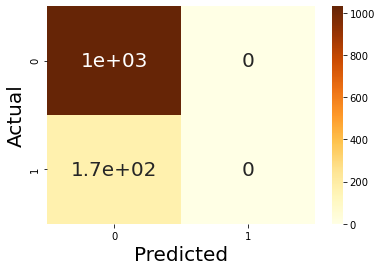

In [64]:
# 혼동 행렬
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='YlOrBr')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

### [4-2] 랜덤 포레스트

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
forest = RandomForestClassifier(n_estimators=150)
forest.fit(X_train, y_train)

<ipython-input-66-c02e534ca3d4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=150)

In [67]:
pred = forest.predict(X_test)
accuracy_score(y_test, pred)

0.8516666666666667

Text(33.0, 0.5, 'Actual')

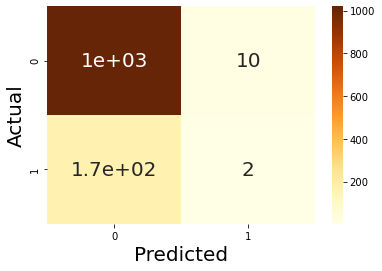

In [68]:
# 혼동 행렬
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='YlOrBr')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

### [4-3] SVM

In [69]:
from sklearn import svm

In [70]:
SVM_ = svm.SVC(kernel='rbf')
SVM_.fit(X_train, y_train)

/home/ai-sjjy/anaconda3/envs/juyoung2/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [71]:
pred = SVM_.predict(X_test)
accuracy_score(y_test, pred)

0.8583333333333333

Text(33.0, 0.5, 'Actual')

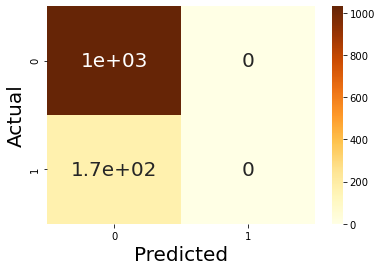

In [72]:
# 혼동 행렬
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='YlOrBr')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

## [5] test_set 예측

In [73]:
test_df

,userID,jobID,keyword_ratio,companySize_A,companySize_B,companySize_C,companySize_D,companySize_E,companySize_F,companySize_G,companySize_None
25,d41e0e6f6f1e29098d9d152511503ab2,15de21c670ae7c3f6f3f1f37029303c9,0.000000,0,1,0,0,0,0,0,0
26,946aa0c612952da8d67dd338a43d5929,15de21c670ae7c3f6f3f1f37029303c9,0.000000,0,1,0,0,0,0,0,0
27,4b847237599e42b2e62a06cdfbe693ec,15de21c670ae7c3f6f3f1f37029303c9,0.000000,0,1,0,0,0,0,0,0
28,bd652bf1e9b66171ef77f1e0db2e9c1e,15de21c670ae7c3f6f3f1f37029303c9,0.000000,0,1,0,0,0,0,0,0
29,6a901742172397a9e4c31a159a982708,15de21c670ae7c3f6f3f1f37029303c9,0.000000,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8430,1f1baa5b8edac74eb4eaa329f14a0361,d81f9c1be2e08964bf9f24b15f0e4900,1.000000,0,0,0,0,0,0,0,1
8431,ebaee1af0c501f22ddfe242fc16dae53,a51fb975227d6640e4fe47854476d133,0.333333,0,0,0,0,1,0,0,0
8432,fa2a28ade168508972790316e314d47e,7940ab47468396569a906f75ff3f20ef,0.000000,0,1,0,0,0,0,0,0
8433,3e15cc11f979ed25912dff5b0669f2cd,74bba22728b6185eec06286af6bec36d,0.000000,0,1,0,0,0,0,0,0


In [75]:
temp_test_df = test_df.drop(['userID', 'jobID'], axis=1)

In [76]:
predictions1 = Logistic.predict(temp_test_df)

/home/ai-sjjy/anaconda3/envs/juyoung2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

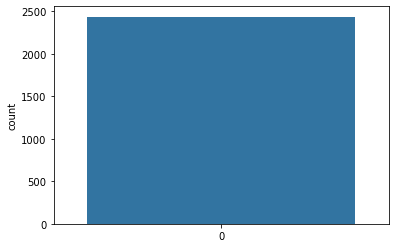

In [81]:
sns.countplot(predictions1)

In [77]:
predictions2 = forest.predict(temp_test_df)

/home/ai-sjjy/anaconda3/envs/juyoung2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

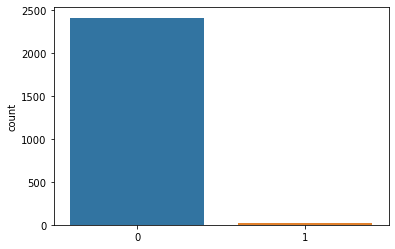

In [80]:
sns.countplot(predictions2)

In [78]:
predictions3 = SVM_.predict(temp_test_df)

/home/ai-sjjy/anaconda3/envs/juyoung2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

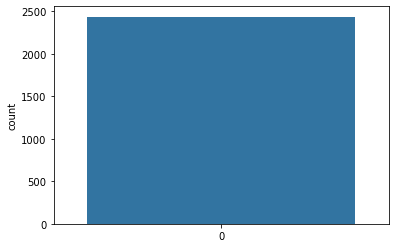

In [82]:
sns.countplot(predictions3)

In [86]:
df = pd.DataFrame(predictions3, columns =['applied'])
df.to_csv(path+'result_3.csv', index=False)

## 결과

* 로지스틱이 가장 좋은 결과 도출